<a href="https://colab.research.google.com/github/Rayden-Xu/Adult_Income_ML-Project/blob/main/income_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ************* Others ****************************
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# 2. Inputing Data

In [3]:
df = pd.read_csv('/content/adult.csv')

In [4]:
df.shape

(48842, 15)

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#For numerical value, we do discriptive analysis.
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Conclusion**

Age: Range from 19 to 90 years, average is 37.

Education_num: from 1 and 16 ,the avg education level is 10 years.

hours.per.week:from 1 and 99, and the average is 40 hours.

----


# 3.DataCleanning

In [8]:
# !!!rename the column name with dash,
# if the dataset use dash to connect, we dont need to use this.
# df = df.rename(columns={'capital.gain':'capital-gain','marital.status':'marital-status',
#                       'capital.loss':'capital-loss','hours.per.week':'hours-per-week',
#                       'native.country':'native-country'})

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
ad_df = df.drop(['educational-num'], axis=1)

In [11]:
# We find ? in 'workclass', 'occupation' .'native.country'
ad_df[ad_df == '?'] = np.nan
ad_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [12]:
#Using Mode to complete Na value
for col in ['workclass', 'occupation', 'native-country']:
    ad_df[col].fillna(ad_df[col].mode()[0], inplace=True)
ad_df.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


# 4. Exploratory Data Analysis

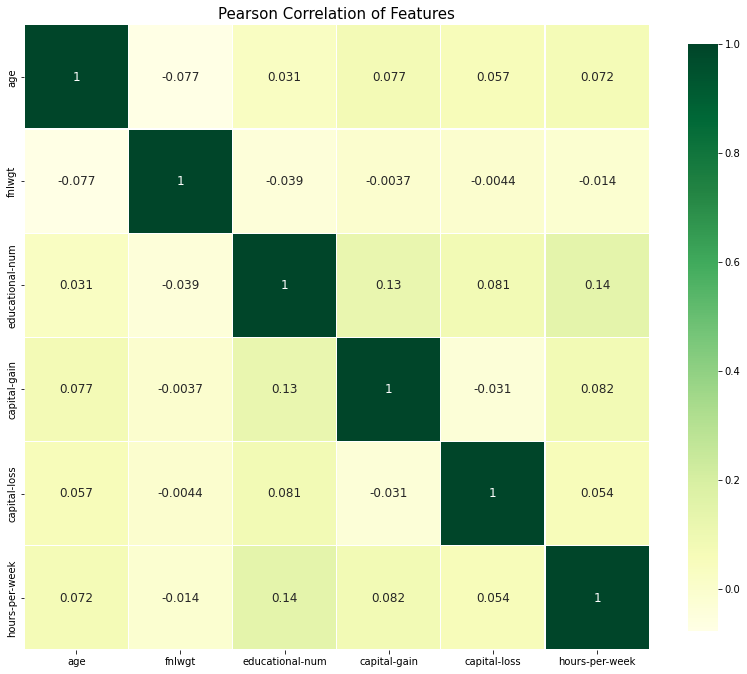

In [13]:
#Heatmap
def correlation_heatmap(ad_df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(ad_df)

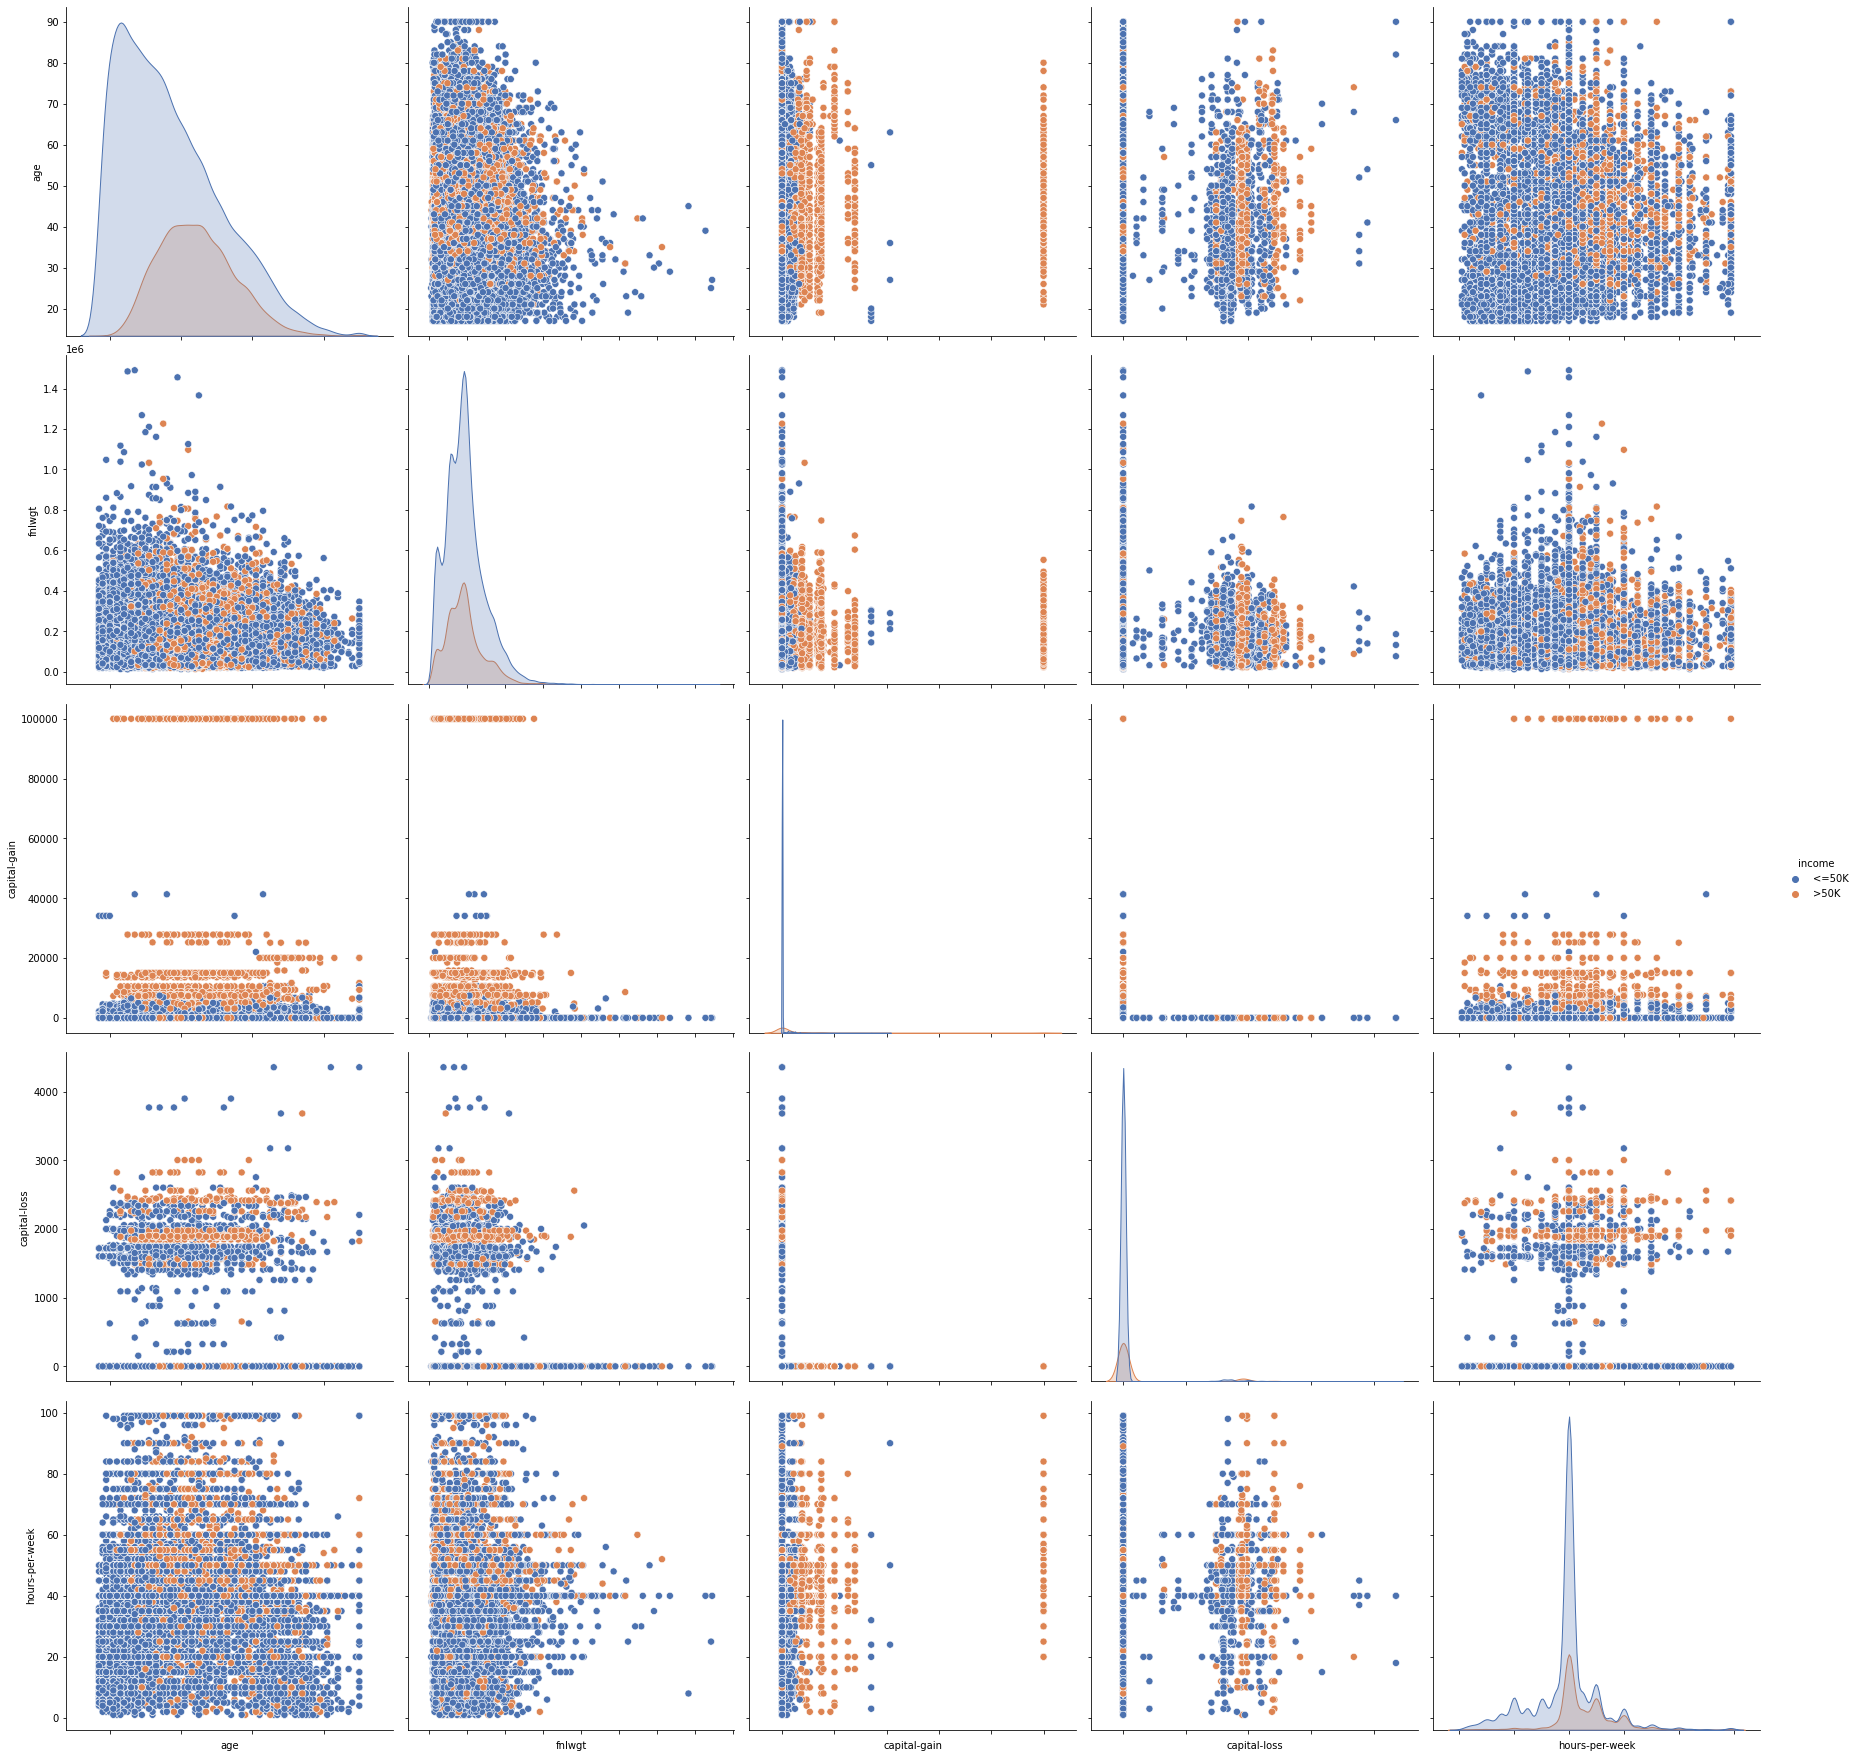

In [14]:
pairplot = sns.pairplot(ad_df, hue = 'income', palette = 'deep', 
                  size=5, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=50) )
pairplot.set(xticklabels=[])

# 5. Feauture Engineerning

## 5.1 Feature combination and dropout

In [15]:
ad_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
print('** Edu **:',ad_df.education.unique(), '\n',
      '** Race **:',ad_df.race.unique(),'\n',
      '** Occupation **:',ad_df.occupation.unique(),'\n',
     '** Relationship **:',ad_df.relationship.unique(),'\n',
     '** Sex **:',ad_df.gender.unique(),'\n',
      '** Marital-status **:' , ad_df['marital-status'].unique(),'\n',
      '** native-country **:', ad_df['native-country'].unique()
     )


** Edu **: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 
 ** Race **: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 
 ** Occupation **: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces'] 
 ** Relationship **: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 
 ** Sex **: ['Male' 'Female'] 
 ** Marital-status **: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 
 ** native-country **: ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan'

### Categorical Feature Combining

In [17]:
# 1.Categorical Feature Combining
ad_df['education'].replace([ 'Preschool', '1st-4th','5th-6th','7th-8th','9th', '10th','11th',  '12th'],
                             'Drop_at_School_level', inplace = True)
ad_df['education'].replace(['Some-college','Assoc-acdm','Assoc-voc' ],'College',inplace=True)

ad_df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse' ],'Married-spouse',inplace=True)

ad_df['native-country'].replace(['England','Scotland'],'UK',inplace=True)
ad_df['native-country'].replace(['Portugal','Germany','Italy','Yugoslavia','Hungary',
                                'Greece', 'Poland','France' ,'Holand-Netherlands'],'Other-Europe',inplace=True)
ad_df['native-country'].replace(['Philippines','Vietnam','Thailand','Cambodia','Laos','Japan','India','Iran'],'Other-Asia',inplace=True)
ad_df['native-country'].replace(['United-States','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Canada'],'North-America',inplace=True)
ad_df['native-country'].replace(['China','Taiwan','Hong'],'China',inplace=True)
ad_df['native-country'].replace(['Peru','Mexico','Dominican-Republic','Haiti',
                              'Cuba','Guatemala','Columbia','Nicaragua', 'Honduras',
                               'Jamaica' ,'Ecuador','El-Salvador','Trinadad&Tobago'] , 'Latin-America',inplace=True)

### Continuous Feature Binning

In [18]:
print(np.min(ad_df['fnlwgt']))
print(np.max(ad_df['fnlwgt']))

12285
1490400


In [19]:
#Binning Function
def Binning(df,col,method,bins):
#     需要判断类型
    uniqs=df[col].nunique()
    if uniqs<=bins:
        raise KeyError('nunique is smaller than bins: '+col)
        return 
#     左开右闭
    def ff(x,fre_list):
        if x<=fre_list[0]:
            return 0
        elif x>fre_list[-1]:
            return len(fre_list)-1
        else :
            for i in range(len(fre_list)-1):
                if x>fre_list[i] and x<=fre_list[i+1]:
                    return i
# 等距分箱
    if method=='distance':
        umax=np.percentile(df[col],99.99)
        umin=np.percentile(df[col],0.01)
        step=(umax-umin)/bins
        fre_list=[umin+i*step for i in range(bins+1)]
        return df[col].map(lambda x:ff(x,fre_list))
#等频分箱
    elif method=='frequency' :
        fre_list=[np.percentile(df[col],100/bins*i) for i in range(bins+1)]
        fre_list=sorted(list(set(fre_list)))
        return df[col].map(lambda x:ff(x,fre_list))


In [20]:
ad_df['fnlwgt'] = Binning(df = ad_df, col = 'fnlwgt',method='frequency',bins=5)

In [21]:
ad_df['age'] = Binning(df = ad_df, col = 'age',method='frequency',bins=5)

In [22]:
ad_df['hours-per-week'] = Binning(df = ad_df, col = 'hours-per-week',method='distance',bins=5)

In [23]:
[np.percentile(ad_df['hours-per-week'],100/5*i) for i in range(5+1)]
#so we use distance instead of frequency method to binning

[0.0, 1.0, 1.0, 1.0, 1.0, 2.0]

In [24]:
print('Fnlwgt',ad_df['fnlwgt'].value_counts())
print('Age',ad_df['age'].value_counts())
print('hours-per-week',ad_df['hours-per-week'].value_counts())


Fnlwgt 1    16284
0    16281
2    16277
Name: fnlwgt, dtype: int64
Age 0    17118
1    16084
2    15640
Name: age, dtype: int64
hours-per-week 1    39261
0     8347
2     1234
Name: hours-per-week, dtype: int64


In [25]:
ad_df.loc[ad_df['capital-gain']!=0, 'capital-gain'] = Binning(df = ad_df[ad_df['capital-gain']!=0], col = 'capital-gain', method = 'frequency', bins = 4) + 1
ad_df['capital-gain'].value_counts()

0    44807
1     2345
2     1690
Name: capital-gain, dtype: int64

In [26]:
ad_df.loc[ad_df['capital-loss']!=0, 'capital-loss'] = Binning(df = ad_df[ad_df['capital-loss']!=0], col = 'capital-loss', method = 'frequency', bins = 4) + 1
ad_df['capital-loss'].value_counts()

0    46560
1     1166
2     1116
Name: capital-loss, dtype: int64

In [27]:
ad_df.head(30)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,Private,2,Drop_at_School_level,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,1,North-America,<=50K
1,1,Private,0,HS-grad,Married-spouse,Farming-fishing,Husband,White,Male,0,0,1,North-America,<=50K
2,0,Local-gov,2,College,Married-spouse,Protective-serv,Husband,White,Male,0,0,1,North-America,>50K
3,1,Private,1,College,Married-spouse,Machine-op-inspct,Husband,Black,Male,2,0,1,North-America,>50K
4,0,Private,0,College,Never-married,Prof-specialty,Own-child,White,Female,0,0,0,North-America,<=50K
5,1,Private,1,Drop_at_School_level,Never-married,Other-service,Not-in-family,White,Male,0,0,0,North-America,<=50K
6,0,Private,2,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,1,North-America,<=50K
7,2,Self-emp-not-inc,0,Prof-school,Married-spouse,Prof-specialty,Husband,White,Male,1,0,0,North-America,>50K
8,0,Private,2,College,Never-married,Other-service,Unmarried,White,Female,0,0,1,North-America,<=50K
9,2,Private,0,Drop_at_School_level,Married-spouse,Craft-repair,Husband,White,Male,0,0,0,North-America,<=50K


## 5.2 Encoding Categorical feature

In [28]:
ad_df['income']=ad_df['income'].map({'<=50K': 0, '>50K': 1})

In [29]:
# create numerical columns representing the categorical data
# ad_df['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
# ad_df['over50K'] = np.where(data.income == '<=50K', 0, 1)
# ad_df['marital_num'] = data['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
# ad_df['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
# ad_df['sex_num'] = np.where(data.sex == 'Female', 0, 1)
# ad_df['relationship'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
# data.head()

In [30]:
from sklearn.preprocessing import LabelEncoder
categ = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'gender','native-country']
le = LabelEncoder()
for col in categ:
    le.fit(ad_df[col])
    ad_df[col] = le.transform(ad_df[col])

In [31]:
ad_df.head(30)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,3,2,3,3,6,3,2,1,0,0,1,3,0
1,1,3,0,4,1,4,0,4,1,0,0,1,3,0
2,0,1,2,1,1,10,0,4,1,0,0,1,3,1
3,1,3,1,1,1,6,0,2,1,2,0,1,3,1
4,0,3,0,1,3,9,3,4,0,0,0,0,3,0
5,1,3,1,3,3,7,1,4,1,0,0,0,3,0
6,0,3,2,4,3,9,4,2,1,0,0,1,3,0
7,2,5,0,6,1,9,0,4,1,1,0,0,3,1
8,0,3,2,1,3,7,4,4,0,0,0,1,3,0
9,2,3,0,3,1,2,0,4,1,0,0,0,3,0


## 5.3 Split dataset

In [49]:
from sklearn.model_selection import train_test_split
X = ad_df.drop(['income'], axis=1)
y = ad_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## 5.4 Feature Scalling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34189, 13) (14653, 13) (34189,) (14653,)


# 6. Gaussian Naive Bayes

In [35]:
from scipy.stats import norm

In [36]:
class GaussianNaiveBayes:
  def __init__(self, X_train, y_train, X_test, y_test) -> None:
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

    
  # def splitData(self):
  #   self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,
  #                                                                            self.y,
  #                                                                            test_size = 0.2,
  #                                                                            random_state = 2)
  
  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  
  def probability(self, x, prior, dist):
    prob = prior

    for i, d in enumerate(dist):
      prob *= d.pdf(x[i])

    return prob


  def fit(self):
    # self.splitData()

    X0_train = self.X_train[self.y_train == 0]           # number of points belonging to class 0
    X1_train = self.X_train[self.y_train == 1]           # number of points belonging to class 1

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    self.X0_dist = np.array([])
    self.X1_dist = np.array([])

    for i in range(self.X_train.shape[1]):
      X0_dist_i = self.fitDistribution(X0_train[:, i])               # dimension i of class 0
      X1_dist_i = self.fitDistribution(X1_train[:, i])               # dimension i of class 1

      self.X0_dist = np.append(self.X0_dist, X0_dist_i)
      self.X1_dist = np.append(self.X1_dist, X1_dist_i)


  def predict(self):
    self.pred = []
    self.actual = []
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior0, self.X0_dist)
      py1 = self.probability(sample, self.prior1, self.X1_dist)
      z = py0+py1

      self.pred.append(np.argmax([py0,py1]))
      self.actual.append(target)

      print('P(y=0|%s) = %.3f' % (sample, (py0 / z) * 100))
      print('P(y=1|%s) = %.3f' % (sample, (py1 / z) * 100))
      print('The model predicted class {} while the target was class {}.\n'.format(np.argmax([py0,py1]), target))


  def score(self):
    acc = sum(np.array(self.pred) == np.array(self.actual)) / len(self.pred)
    print('The accuracy of Gaussian Naive Bayes is {}.'.format(acc))

In [37]:
clf = GaussianNaiveBayes(X_train, y_train, X_test, y_test)

In [38]:
clf.fit()

In [39]:
clf.predict()

流式输出内容被截断，只能显示最后 5000 行内容。
P(y=0|[ 0.03386426 -0.09485932  1.22600045  0.9360095  -1.3528218  -1.04932229
  1.59288565  0.39064593  0.70146793 -0.28150028 -0.20888859  0.3479702
 -0.01108523]) = 95.768
P(y=1|[ 0.03386426 -0.09485932  1.22600045  0.9360095  -1.3528218  -1.04932229
  1.59288565  0.39064593  0.70146793 -0.28150028 -0.20888859  0.3479702
 -0.01108523]) = 4.232
The model predicted class 0 while the target was class 0.

P(y=0|[-1.18742815 -0.09485932 -1.22213373  0.9360095   0.96869728 -0.03850188
 -0.27627246 -3.17406766 -1.42558192 -0.28150028 -0.20888859  0.3479702
  2.14228307]) = 99.998
P(y=1|[-1.18742815 -0.09485932 -1.22213373  0.9360095   0.96869728 -0.03850188
 -0.27627246 -3.17406766 -1.42558192 -0.28150028 -0.20888859  0.3479702
  2.14228307]) = 0.002
The model predicted class 0 while the target was class 0.

P(y=0|[ 1.25515667 -0.09485932  1.22600045  0.9360095  -1.3528218  -1.55473249
 -0.27627246  0.39064593 -1.42558192 -0.28150028 -0.20888859  0.3479702
 -0.01

In [40]:
clf.score()

The accuracy of Gaussian Naive Bayes is 0.791169043881799.


# 7. Decision Tree

In [41]:
import operator
from math import log

In [42]:
class DecisionTree:
  def __init__(self) -> None:
    self.featureName = []         # 存储选出的用于分裂的最佳特征


  def majorityCnt(self, y):
    countClass = {}
    for i in y:
      if i not in countClass.keys():
        countClass[i] = 0
      countClass[i] += 1

    sortCount = sorted(countClass.items(), key = operator.itemgetter(1), reverse = True)

    return sortCount[0][0]


  def calculateEntropy(self, y):
    elements, counts = np.unique(y, return_counts = True)
    prob = counts / len(y)
    entropy = -np.sum([prob[i] * log(prob[i],2) for i in range(len(prob))])

    return entropy


  def selectFeature(self, X, y):
      featureNumber = len(X[0])
      entropy = self.calculateEntropy(y)
      maxInfoGain = 0
      bestFeature = -1

      for i in range(featureNumber):
        featureValues = [item[i] for item in X]
        uniqueValue = set(featureValues)
        newEntropy = 0

        for val in uniqueValue:
          sub_X, sub_y = self.newDataset(X, y, i, val)
          prob = len(sub_y) / len(y)
          newEntropy += prob * self.calculateEntropy(sub_y)

        infoGain = entropy - newEntropy

        if (infoGain > maxInfoGain):
          maxInfoGain = infoGain
          bestFeature = i	

      return bestFeature


  def newDataset(self, X, y, idx, val):
    new_X = []
    new_y = []

    for sample, target in zip(X, y):
      if sample[idx] == val:
        sample = np.delete(sample, idx)
        new_X.append(sample)
        new_y.append(target)
    
    return new_X, new_y


  def createTree(self, X, y, columnNames):
    # 检查纯度（全为一类）
    if y.count(y[0]) == len(y):
      return y[0]
    
    # 检查特征数量，只剩一个时，停止分裂
    if len(X[0]) == 1:
      return self.majorityCnt(y)

    bestFeature = self.selectFeature(X, y)

    bestFeatureName = columnNames[bestFeature]
    self.featureName.append(bestFeatureName)

    myTree = {bestFeatureName:{}}
    del columnNames[bestFeature]

    featureValue = [item[bestFeature] for item in X]

    for val in set(featureValue):
      subColnames = columnNames[:]
      new_X, new_y = self.newDataset(X, y, bestFeature, val)
      myTree[bestFeatureName][val] = self.createTree(new_X, new_y, subColnames)

    return myTree


  # 预测：对输入对象进行ID3分类
  def predict(self, myTree, X_test, y_test):
      self.pred = []
      self.actual = []

      for sample, target in zip(X_test.to_dict('records'), y_test):
        tree = myTree
        self.actual.append(target)
        
        # 判断输入值是否为“dict”
        while type(tree).__name__ == 'dict':
            key = list(tree.keys())[0]
            tree = tree[key][sample[key]]
        
        self.pred.append(tree)
      
        print('The model predicted class {} while the target was class {}.\n'.format(tree, target))

  
  def score(self):
    acc = sum(np.array(self.pred) == np.array(self.actual)) / len(self.pred)
    print('The accuracy of Decision Tree Model is {}.'.format(acc))


  def getNumLeafs(self, myTree):
    numLeafs = 0												
    firstStr = next(iter(myTree))								
    secondDict = myTree[firstStr]								
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				
            numLeafs += self.getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs


  def getTreeDepth(self, myTree):
    maxDepth = 0												
    firstStr = next(iter(myTree))								
    secondDict = myTree[firstStr]								
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				
            thisDepth = 1 + self.getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth			
    return maxDepth


  def plotNode(self, nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")	
    self.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction',	
      xytext = centerPt, textcoords = 'axes fraction',
      va = 'center', ha = 'center', bbox = nodeType, arrowprops = arrow_args)


  def plotMidText(self, cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]																
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    self.ax1.text(xMid, yMid, txtString, va = 'center', ha = 'center', rotation=30)


  def plotTree(self, myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')										
    leafNode = dict(boxstyle = 'round4', fc='0.8')											
    numLeafs = self.getNumLeafs(myTree)  														
    depth = self.getTreeDepth(myTree)															
    firstStr = next(iter(myTree))																								
    cntrPt = (self.xOff + (1.0 + float(numLeafs))/2.0/self.totalW, self.yOff)	
    self.plotMidText(cntrPt, parentPt, nodeTxt)													
    self.plotNode(firstStr, cntrPt, parentPt, decisionNode)										
    secondDict = myTree[firstStr]															
    self.yOff = self.yOff - 1.0/self.totalD										
    for key in secondDict.keys():								
      if type(secondDict[key]).__name__ == 'dict':											
        self.plotTree(secondDict[key], cntrPt, str(key))        								
      else:																														
        self.xOff = self.xOff + 1.0/self.totalW
        self.plotNode(secondDict[key], (self.xOff, self.yOff), cntrPt, leafNode)
        self.plotMidText((self.xOff, self.yOff), cntrPt, str(key))
    self.yOff = self.yOff + 1.0/self.totalD


  def createPlot(self, inTree):
    fig = plt.figure(1, facecolor = 'white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks = [], yticks = [])
    self.ax1  = plt.subplot(111, frameon = False, **axprops)    							#去掉x、y轴
    self.totalW = float(self.getNumLeafs(inTree))											#获取决策树叶结点数目
    self.totalD = float(self.getTreeDepth(inTree))											#获取决策树层数
    self.xOff = -0.5/self.totalW; self.yOff = 1.0;								#x偏移
    self.plotTree(inTree, (0.5,1.0), '')															#绘制决策树
    plt.show()

In [43]:
# colNames = X_train.columns.tolist()
# X_train = np.array(round(X_train, 5)).tolist()
# y_train = np.array(round(y_train, 5)).tolist()

In [50]:
dt = DecisionTree()

In [51]:
# myTree = dt.createTree(X = np.array(round(X_train, 5)).tolist(), y = np.array(y_train).tolist(), columnNames = X_train.columns.tolist())
myTree = dt.createTree(X = np.array(X_train).tolist(), y = np.array(y_train).tolist(), columnNames = X_train.columns.tolist())

In [52]:
print(myTree)

{'relationship': {0: {'education': {0: {'capital-gain': {0: {'occupation': {0: {'hours-per-week': {0: 0, 1: {'native-country': {0: 0, 2: {'age': {1: 0, 2: 1}}, 3: {'capital-loss': {0: {'age': {0: {'fnlwgt': {0: 1, 1: 0, 2: {'workclass': {1: 0, 3: {'gender': {1: {'race': {4: 1}}}}}}}}, 1: {'race': {1: {'workclass': {0: 0, 3: 1}}, 2: {'workclass': {1: 1, 3: 1, 6: 0}}, 3: 1, 4: {'workclass': {0: {'fnlwgt': {0: {'gender': {1: 1}}, 1: {'gender': {1: 1}}, 2: 0}}, 1: {'gender': {1: {'marital-status': {1: 1}}}}, 3: {'fnlwgt': {0: {'gender': {1: 0}}, 1: {'gender': {1: 0}}, 2: {'gender': {1: 1}}}}, 6: {'fnlwgt': {0: 1, 1: {'gender': {1: 1}}}}}}}}, 2: {'workclass': {0: {'fnlwgt': {0: {'gender': {1: {'race': {4: 1}}}}, 1: 1, 2: 1}}, 1: 1, 3: {'race': {1: 1, 4: {'fnlwgt': {0: {'gender': {1: 1}}, 1: {'gender': {1: 1}}, 2: {'gender': {1: 1}}}}}}, 4: {'fnlwgt': {0: 0, 2: 1}}, 5: 1, 6: {'fnlwgt': {0: 1, 1: 1, 2: 0}}}}}}, 1: {'fnlwgt': {0: 0, 1: 1}}, 2: 1}}, 4: {'fnlwgt': {0: {'workclass': {0: 1, 3: 0}}

In [53]:
for i in range(13):
  print(X_test.columns[i], ':', len(X_test.iloc[:, i].value_counts()))

age : 3
workclass : 8
fnlwgt : 3
education : 7
marital-status : 6
occupation : 14
relationship : 6
race : 5
gender : 2
capital-gain : 3
capital-loss : 3
hours-per-week : 3
native-country : 8


In [54]:
dt.predict(myTree = myTree, X_test = X_test, y_test = y_test)
# dt.predict(myTree = myTree, X_test = round(X_train, 5), y_test = y_train)

The model predicted class 1 while the target was class 0.

The model predicted class 1 while the target was class 1.

The model predicted class 0 while the target was class 1.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 0.

The model predicted class 1 while the target was class 1.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 1.

The model predicted class 0 while the target was class 1.

The model predicted class 0 while the target was class 0.

The model predicted class 0 while the target was class 1.

The model predicted class 1 while the target was class 0.

The model predicted class 0 while the target was class 1.

The model predicted class 0 while the target was class 0

KeyError: ignored

** 问题fnlwgt

In [ ]:
dt.score()

In [ ]:
# dt.createPlot(inTree = myTree)

# 8. Random Forest

In [ ]:
from random import randrange
from math import sqrt

In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  dataset_split = []
  dataset_copy = list(dataset)
  fold_size = len(dataset) / n_folds

  for i in range(n_folds):
    fold = []
    while len(fold) < np.floor(fold_size):
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)

  return dataset_split


# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = cross_validation_split(dataset, n_folds)
  scores = []
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = []
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores


# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  left, right = [], []
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right


# Calculate the Gini index for a split dataset
def gini_index(groups, class_values):
  gini = 0.0
  for class_value in class_values:
    for group in groups:
      size = len(group)
      if size == 0:
        continue
      proportion = [row[-1] for row in group].count(class_value) / float(size)
      gini += (proportion * (1.0 - proportion))
  return gini


# Select the best split point for a dataset
def get_split(dataset, max_features):
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  features = []
  while len(features) < max_features:
    index = randrange(len(dataset[0])-1)
    if index not in features:
      features.append(index)
  for index in features:
    for row in dataset:
      groups = test_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
  return {'index':b_index, 'value':b_value, 'groups':b_groups}


# Create a terminal node value
def to_terminal(group):
  outcomes = [row[-1] for row in group]
  return max(set(outcomes), key = outcomes.count)


# Create child splits for a node or make terminal
def split(node, max_depth, min_size, max_features, depth):
  left, right = node['groups']
  del(node['groups'])
  # check for a no split
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return
  # check for max depth
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return
  # process left child
  if len(left) <= min_size:
    node['left'] = to_terminal(left)
  else:
    node['left'] = get_split(left, max_features)
    split(node['left'], max_depth, min_size, max_features, depth+1)
  # process right child
  if len(right) <= min_size:
    node['right'] = to_terminal(right)
  else:
    node['right'] = get_split(right, max_features)
    split(node['right'], max_depth, min_size, max_features, depth + 1)


# Build a decision tree
def build_tree(train, max_depth, min_size, max_features):
  root = get_split(dataset, max_features)
  split(root, max_depth, min_size, max_features, 1)
  return root


# Make a prediction with a decision tree
def predict(node, row):
  if row[node['index']] < node['value']:
    if isinstance(node['left'], dict):
      return predict(node['left'], row)
    else:
      return node['left']
  else:
    if isinstance(node['right'], dict):
      return predict(node['right'], row)
    else:
      return node['right']


# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
  sample = []
  n_sample = round(len(dataset) * ratio)

  while len(sample) < n_sample:
    index = randrange(len(dataset))
    sample.append(dataset[index])

  return sample


# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
  predictions = [predict(tree, row) for tree in trees]
  return max(set(predictions), key = predictions.count)


# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_estimators, max_features):
  trees = []
  for i in range(n_estimators):
    sample = subsample(train, sample_size)
    tree = build_tree(sample, max_depth, min_size, max_features)
    trees.append(tree)
  predictions = [bagging_predict(trees, row) for row in test]

  return predictions

In [ ]:
from sklearn import datasets

iris_df = datasets.load_iris()
iris_X = pd.DataFrame(data = iris_df.data, columns = iris_df.feature_names)
iris_Y = pd.DataFrame(data = iris_df.target, columns = ['Class'])
iris = pd.concat([iris_X, iris_Y], axis = 1)
# dataset = np.array(iris).tolist()

In [ ]:
# evaluate algorithm
# n_folds = 5
# max_depth = 10
# min_size = 1
# sample_size = 1.0
# max_features = int(sqrt(len(dataset[0])-1))


# for n_estimators in [1, 5, 10, 20, 30]:
#   scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_estimators, max_features)
#   print('Number of Trees: %d' % n_estimators)
#   print('Scores: %s' % scores)
#   # print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))
#   print('Mean Accuracy: %.3f%%' % (sum(scores) / len(scores)), '\n')

In [ ]:
y = y_train
y.index = range(len(y))
dataset = np.array(pd.concat([X_train, y], axis = 1)).tolist()

In [ ]:
# evaluate algorithm
n_folds = 2
max_depth = 10
min_size = 1
sample_size = 1.0
max_features = int(sqrt(len(dataset[0])-1))


for n_estimators in [1, 5, 10]:
  scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_estimators, max_features)
  print('Number of Trees: %d' % n_estimators)
  print('Scores: %s' % scores)
  # print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))
  print('Mean Accuracy: %.3f%%' % (sum(scores) / len(scores)), '\n')

# 10. K-Fold Cross Validation

In [13]:
#https://www.kaggle.com/code/burhanykiyakoglu/k-nn-logistic-regression-k-fold-cv-from-scratch/notebook
def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 
#By using the cross_validation_split function I defined my main function below. This function takes each fold as test and returns the accuricies for each fold.

def kfoldCV(dataset, f=5, k=5, model="logistic"):
    data=cross_validation_split(dataset,f)
    result=[]
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        # apply the selected model
        # default is logistic regression
        if model == "logistic":
            # default: alpha=0.1, num_iter=30000
            # if you change alpha or num_iter, adjust the below line         
            c = logistic(cv[:,0:4],cv[:,4],data[i][:,0:4])
            test = c['Y_prediction_test']
        elif model == "knn":
            test = kNN(cv[:,0:4],cv[:,4],data[i][:,0:4],k)
            
        # calculate accuracy    
        acc=(test == data[i][:,4]).sum()
        result.append(acc/len(test))
        
    return result